In [29]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect(os.path.abspath('final.db'))
cur = conn.cursor()

In [30]:
weekly_prices_query = "SELECT wp.*, we.index_value, s.ticker FROM WeeklyPrices wp JOIN WeeklyEconomicIndex we ON wp.date = we.date join Stocks s on wp.stock_id = s.id  "
sentiment_query = "SELECT * FROM SentimentData"
weekly_economic_index = "SELECT * FROM WeeklyEconomicIndex"


In [31]:
weekly_prices_df = pd.read_sql(weekly_prices_query, conn)
sentiment_df = pd.read_sql(sentiment_query, conn)
weekly_prices_df.head(10)



,stock_id,date,open,high,low,close,volume,index_value,ticker
0,1,2024-11-29,141.99,142.050,131.8000,138.25,903463597,1.79,NVDA
1,1,2024-11-22,139.50,152.890,137.1500,141.95,1396925283,3.21,NVDA
2,1,2024-11-15,148.68,149.650,140.0800,141.98,1017459795,1.87,NVDA
3,1,2024-11-08,137.21,149.770,135.5700,147.63,973098624,2.04,NVDA
4,1,2024-11-01,143.00,143.140,132.1106,135.40,987765940,1.65,NVDA
5,1,2024-10-25,138.13,144.420,137.4600,141.54,1154273138,2.11,NVDA
6,1,2024-10-18,136.47,140.890,128.7400,138.00,1357584514,1.71,NVDA
7,1,2024-10-11,124.99,135.780,124.9500,134.80,1290685141,1.94,NVDA
8,1,2024-10-04,118.31,125.040,115.1400,124.92,1272577548,2.22,NVDA
9,1,2024-09-27,116.55,127.665,114.8600,121.40,1419480253,2.07,NVDA


In [ ]:
# filter the time range

In [4]:
# Visualization 1
# date from WeeklyEconomicIndex
cur.execute("SELECT date FROM WeeklyEconomicIndex")
date_data = cur.fetchall()

import datetime
date_ls = []
for i in date_data:
    date = i[0]
    date_ls.append(datetime.datetime.strptime(date, "%Y-%m-%d"))

In [5]:
# weekly economic index from WeeklyEconomicIndex
cur.execute("SELECT index_value FROM WeeklyEconomicIndex")
ls = cur.fetchall()
index_data_ls = []
for i in ls:
    index = i[0]
    index_data_ls.append(index)

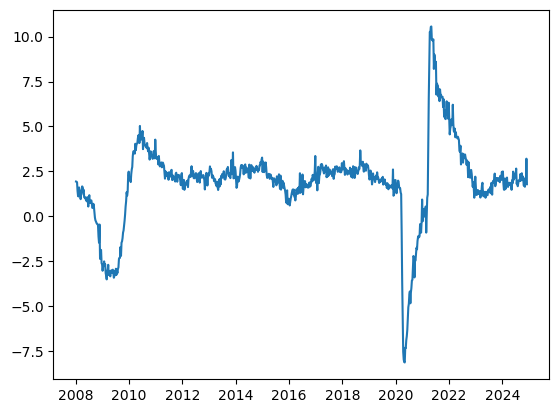

In [6]:
plt.plot(date_ls, index_data_ls)
# COVID
# percentage_growth = []
# percentage_growth.append(0)
# for i in range(1, len(index_data_ls)):
#     if index_data_ls[i - 1] == 0:
#         growth = None
#     else:
#         growth = ((index_data_ls[i] - index_data_ls[i - 1]) / index_data_ls[i - 1]) * 100
#     percentage_growth.append(growth)
# plt.plot(date_ls, percentage_growth)

In [39]:
# Visualization 2
# date from WeeklyPrices
cur.execute("SELECT date FROM WeeklyPrices")
date_data = cur.fetchall()

import datetime
date_ls = []
for i in date_data:
    date = i[0]
    date_ls.append(datetime.datetime.strptime(date, "%Y-%m-%d"))

In [ ]:
# weekly economic index from WeeklyPrices
cur.execute("SELECT index_value FROM WeeklyPrices")
ls = cur.fetchall()
index_data_ls = []
for i in ls:
    index = i[0]
    index_data_ls.append(index)

In [ ]:
# Visualization 3